<a href="https://colab.research.google.com/github/salauddinkhan1986/LOGISTIC-REGRESSION-PROJECT/blob/main/logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Logistic Regression Project

# Importing required Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Reading dataset

In [4]:
data = pd.read_csv('/content/portu_banking_final.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,210,1,999.0,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,138,1,999.0,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,339,3,6.0,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,185,2,999.0,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,137,1,3.0,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


In [6]:
data.shape

(41188, 21)

**statistical analysis**

In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
duration,41188.0,258.285010,259.279249,0.000,102.000,180.000,319.000,4918.000
campaign,41188.0,2.567593,2.770014,1.000,1.000,2.000,3.000,56.000
pdays,41188.0,963.568005,211.772296,0.000,999.000,999.000,999.000,9999.000
previous,41188.0,0.172963,0.494901,0.000,0.000,0.000,0.000,7.000
emp_var_rate,41188.0,0.081886,1.570960,-3.400,-1.800,1.100,1.400,1.400
cons_price_idx,41188.0,93.575664,0.578840,92.201,93.075,93.749,93.994,94.767
cons_conf_idx,41188.0,-40.502600,4.628198,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,41188.0,3.621291,1.734447,0.634,1.344,4.857,4.961,5.045
nr_employed,41188.0,5167.035911,72.251528,4963.600,5099.100,5191.000,5228.100,5228.100
y,41188.0,0.112654,0.316173,0.000,0.000,0.000,0.000,1.000


In [8]:
missing_value = data.isna().sum()
missing_value

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp_var_rate      0
cons_price_idx    0
cons_conf_idx     0
euribor3m         0
nr_employed       0
y                 0
dtype: int64

**cORRELATION OF DATA**

In [9]:
corre_data = data.corr()
corre_data

,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
duration,1.000000,-0.071699,-0.044035,0.020640,-0.027968,0.005312,-0.008173,-0.032897,-0.044703,0.405274
campaign,-0.071699,1.000000,0.045353,-0.079141,0.150754,0.127836,-0.013733,0.135133,0.144095,-0.066357
pdays,-0.044035,0.045353,1.000000,-0.518260,0.241416,0.070331,-0.082578,0.263918,0.331380,-0.288609
previous,0.020640,-0.079141,-0.518260,1.000000,-0.420489,-0.203130,-0.050936,-0.454494,-0.501333,0.230181
emp_var_rate,-0.027968,0.150754,0.241416,-0.420489,1.000000,0.775334,0.196041,0.972245,0.906970,-0.298334
cons_price_idx,0.005312,0.127836,0.070331,-0.203130,0.775334,1.000000,0.058986,0.688230,0.522034,-0.136211
cons_conf_idx,-0.008173,-0.013733,-0.082578,-0.050936,0.196041,0.058986,1.000000,0.277686,0.100513,0.054878
euribor3m,-0.032897,0.135133,0.263918,-0.454494,0.972245,0.688230,0.277686,1.000000,0.945154,-0.307771
nr_employed,-0.044703,0.144095,0.331380,-0.501333,0.906970,0.522034,0.100513,0.945154,1.000000,-0.354678
y,0.405274,-0.066357,-0.288609,0.230181,-0.298334,-0.136211,0.054878,-0.307771,-0.354678,1.000000


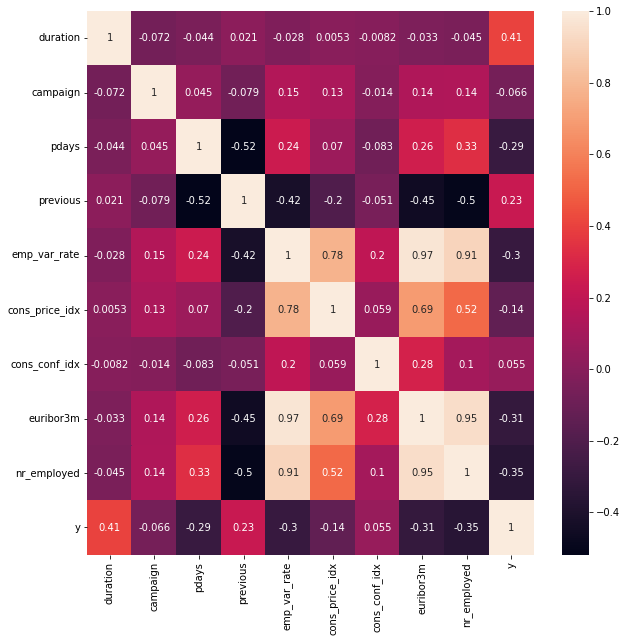

In [10]:
plt.figure(figsize=(10,10))
sns.heatmap(corre_data,annot=True)

# Data Cleaning

In [11]:
data.dtypes

age                object
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays             float64
previous            int64
poutcome           object
emp_var_rate      float64
cons_price_idx    float64
cons_conf_idx     float64
euribor3m         float64
nr_employed       float64
y                   int64
dtype: object

In [12]:
data['age'].unique()

array(['44', '53', '28', '39', '55', '30', '37', '36', '27', '34', '41',
       '33', '26', '52', '35', '40', '32', '49', '38', '47', '46', '29',
       '54', '42', '72', '48', '43', '56', '31', '24', '68', '59', '50',
       '45', '35-30', '25', '57', '63', '58', '60', '30-35', '64', '51',
       '23', '20', '74', '80', '61', '25-30', '62', '75', '21', '82',
       '77', '18-25', '30-32', '70', '50-55', '76', '73', '66', '22',
       '71', '19', '79', '88', '65', '67', '81', '18', '84', '69', '98',
       '85', '83', '78', '92', '45-50', '20-25', '20-40', '35-40', '86',
       '94', '17', '91', '89', '87', '95', '30-40', 56, 39, 30, 53, 37,
       22, 45, 31, 24, 50, 58, 33, 27, 28, 32, 51, 41, 49, 43, 44, 35, 29,
       26, 57, 25, 42, 48, 46, 67, 38, 34, 54, 40, 23, 47, 62, 75, 55, 36,
       52, 59, 78, 70, 60, 20, 66, 61, 21, 88, 18, 68, 71, 73, 80, 79, 63,
       76, 83, 65, 19, 86, 17, 72, 69, 81, 64, 77, 74, 85, 82],
      dtype=object)

In [13]:
# replacing all the age range with theire respective mean value
data['age']=data['age'].replace(['35-30'],33)
data['age']=data['age'].replace(['30-35'],33)
data['age']=data['age'].replace(['25-30'],28)
data['age']=data['age'].replace(['18-25'],22)
data['age']=data['age'].replace(['30-32'],31)
data['age']=data['age'].replace(['50-55'],53)
data['age']=data['age'].replace(['50-55'],53)
data['age']=data['age'].replace(['45-50'],48)
data['age']=data['age'].replace(['20-25'],23)
data['age']=data['age'].replace(['20-40'],30)
data['age']=data['age'].replace(['35-40'],38)
data['age']=data['age'].replace(['30-40'],33)


In [14]:
#change data type of age 
data['age']=data['age'].apply(pd.to_numeric)
print(data.age.dtypes)


int64


In [15]:
data['marital'].value_counts()

married     24923
single      11565
divorced     4608
unknown        80
M               5
D               4
S               3
Name: marital, dtype: int64

In [16]:
data['marital']=data['marital'].replace('M','married')
data['marital']=data['marital'].replace('unknown','married')
data['marital']=data['marital'].replace('D','divorced')
data['marital']=data['marital'].replace('S','single')

In [17]:
data['marital'].value_counts()

married     25008
single      11568
divorced     4612
Name: marital, dtype: int64

In [18]:
data['education'].value_counts()

university.degree      12168
high.school             9515
basic.9y                6035
professional.course     5243
basic.4y                4164
basic.6y                2286
unknown                 1731
illiterate                18
basic-4y                  12
basic-9y                  10
basic-6y                   6
Name: education, dtype: int64

In [19]:
data['education']=data['education'].replace('unknown','university.degree')

In [20]:
data['education'].value_counts()

university.degree      13899
high.school             9515
basic.9y                6035
professional.course     5243
basic.4y                4164
basic.6y                2286
illiterate                18
basic-4y                  12
basic-9y                  10
basic-6y                   6
Name: education, dtype: int64

In [21]:
data['default'].value_counts()

no         32588
unknown     8597
yes            3
Name: default, dtype: int64

In [22]:
data['default']=data['default'].replace('unknown','no')

In [23]:
data['default'].value_counts()

no     41185
yes        3
Name: default, dtype: int64

In [24]:
data['housing'].value_counts()

yes        21576
no         18622
unknown      990
Name: housing, dtype: int64

In [25]:
data['housing']=data['housing'].replace('unknown','yes')

In [26]:
data['housing'].value_counts()

yes    22566
no     18622
Name: housing, dtype: int64

In [27]:
data['loan'].value_counts()

no         33950
yes         6248
unknown      990
Name: loan, dtype: int64

In [28]:
data['loan']=data['loan'].replace('unknown','no')

In [29]:
data['loan'].value_counts()

no     34940
yes     6248
Name: loan, dtype: int64

In [30]:
data['contact'].value_counts()

cellular     26144
telephone    15044
Name: contact, dtype: int64

In [31]:
data.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays             float64
previous            int64
poutcome           object
emp_var_rate      float64
cons_price_idx    float64
cons_conf_idx     float64
euribor3m         float64
nr_employed       float64
y                   int64
dtype: object

# Section III : Exploring data with Group by

In [34]:
data[['education','y']].groupby('education').mean()

,y
education,
basic-4y,0.083333
basic-6y,0.000000
basic-9y,0.000000
basic.4y,0.102546
basic.6y,0.082240
basic.9y,0.078376
high.school,0.108355
illiterate,0.222222
professional.course,0.113485


In [35]:
data[['marital','y']].groupby('marital').mean()

,y
marital,
divorced,0.103209
married,0.101727
single,0.140041


In [36]:
data[['job','y']].groupby('job').mean()

,y
job,
ADMIN.,0.000000
BLUE-COLLAR,0.000000
HOUSEMAID,0.000000
MANAGEMENT,0.000000
RETIRED,0.333333
SERVICES,0.000000
STUDENT,1.000000
TECHNICIAN,0.000000
UNKNOWN,0.000000


In [51]:
title=[]
total=[]
yes_count=[]
no_count=[]

for i in data['job'].value_counts().index:
  df_job=pd.DataFrame()
  df_job=data[data['job']==i]
  title.append(i)
  total.append(df_job.shape[0])
  yes_count.append(df_job[df_job['y']==1].count()['y'])
  no_count.append(df_job[df_job['y']==0].count()['y'])
df_jobs=pd.DataFrame()

df_jobs['Job Title']=title
df_jobs['Total']=total

df_jobs['Yes']=yes_count
df_jobs["No"]=no_count
df_jobs


,Job Title,Total,Yes,No
0,admin.,10420,1352,9068
1,blue-collar,9253,638,8615
2,technician,6742,730,6012
3,services,3966,323,3643
4,management,2923,328,2595
5,retired,1717,433,1284
6,entrepreneur,1456,124,1332
7,self-employed,1421,149,1272
8,housemaid,1059,106,953
9,unemployed,1014,144,870


# Section III : Exploratory Data Analysis

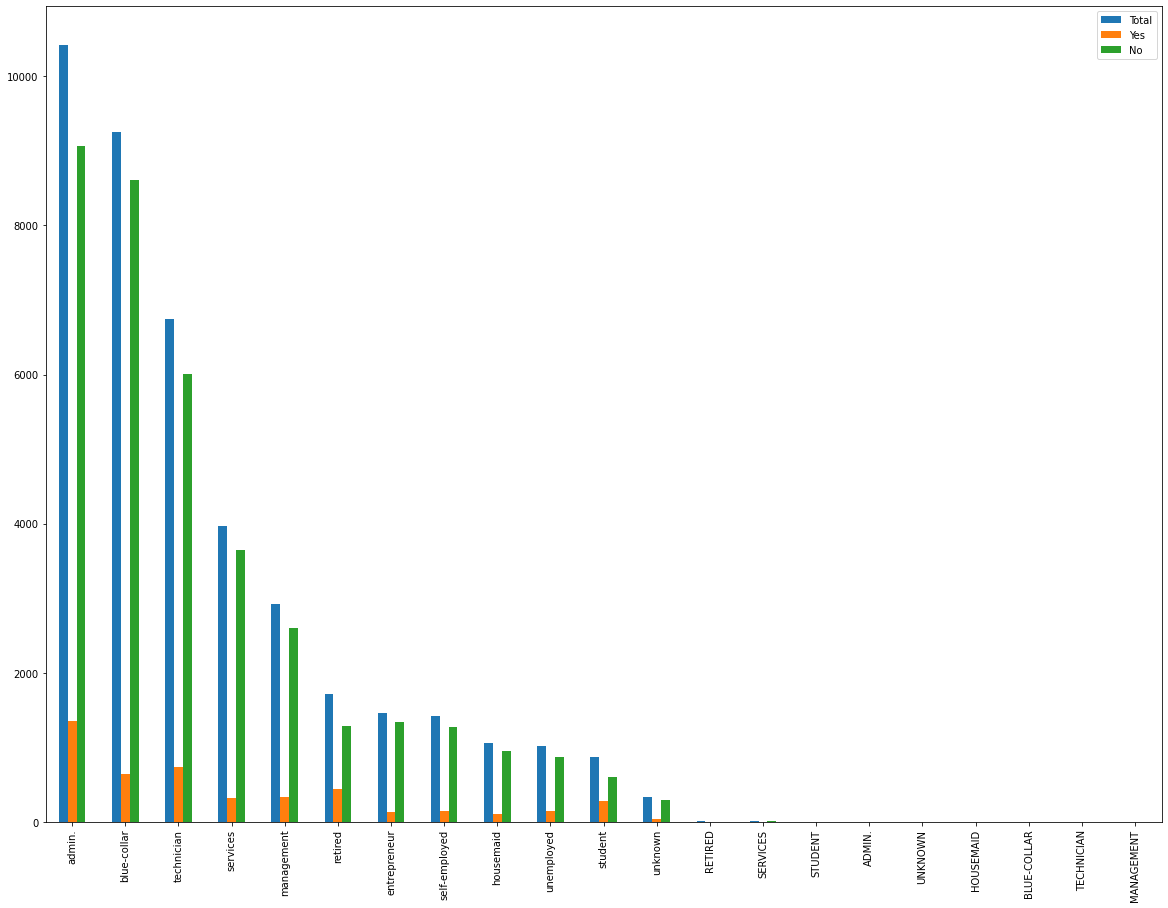

In [58]:
labels=df_jobs['Job Title']
positions=np.arange(0,21,1)
df_jobs.plot(kind='bar',figsize=(20,15))
plt.xticks(positions,labels)
plt.show()


In [45]:
title=[]
total=[]
yes_count=[]
no_count=[]

for i in data['marital'].value_counts().index:
  df_marital=pd.DataFrame()
  df_marital=data[data['marital']==i]
  title.append(i)
  total.append(df_marital.shape[0])
  yes_count.append(df_marital[df_marital['y']==1].count()['y'])
  no_count.append(df_marital[df_marital['y']==0].count()['y'])
df_marital=pd.DataFrame()

df_marital['marital_status']=title
df_marital['Total']=total

df_marital['Yes']=yes_count
df_marital["No"]=no_count
df_marital

,marital_status,Total,Yes,No
0,married,25008,2544,22464
1,single,11568,1620,9948
2,divorced,4612,476,4136


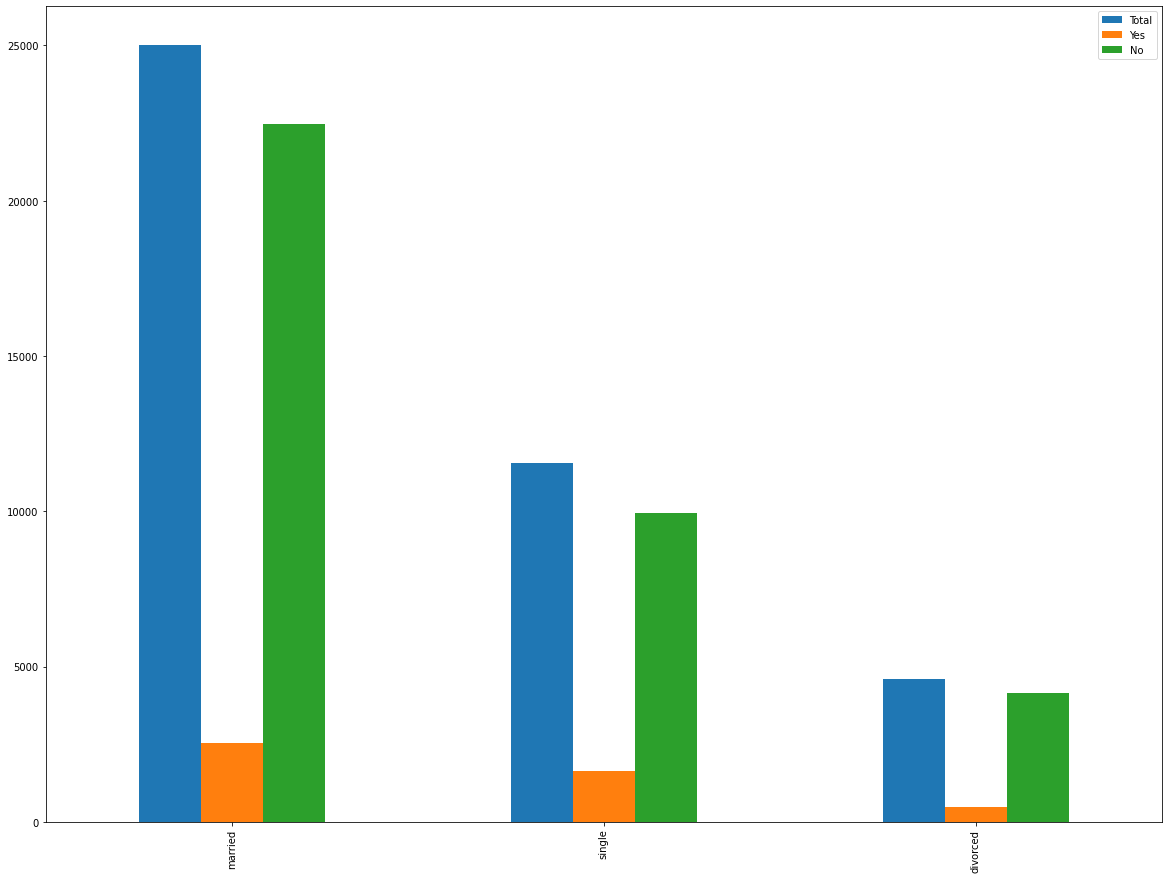

In [47]:
labels=df_marital['marital_status']
positions=np.arange(0,3,1)
df_marital.plot(kind='bar',figsize=(20,15))
plt.xticks(positions,labels)
plt.show()

In [54]:
df_jobs_final=pd.DataFrame()
df_jobs_final['Job Title']=title
df_jobs_final['Percentage_yes']=(df_jobs['Yes']/df_jobs['Total'])*100
df_jobs_final['Percentage_no']=(df_jobs['No']/df_jobs['Total'])*100
df_jobs_final=df_jobs_final.sort_values('Percentage_yes',ascending=False)


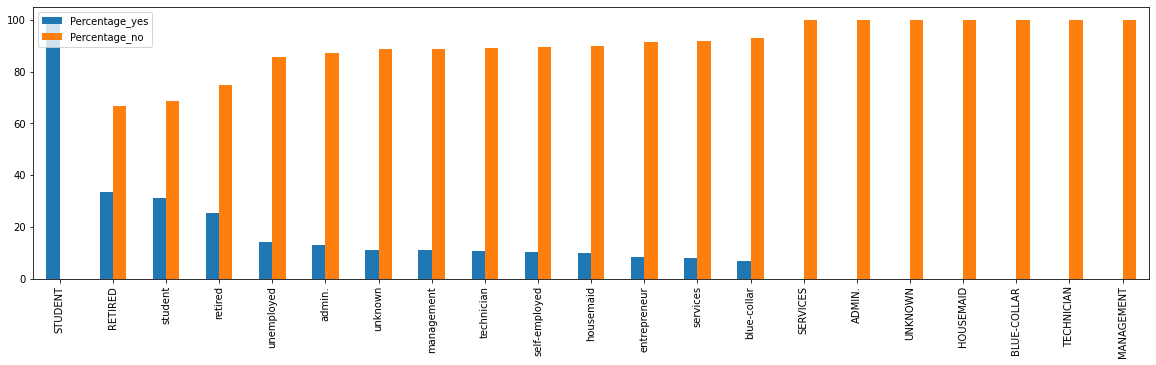

In [59]:
labels=df_jobs_final['Job Title'].tolist()
position=df_jobs_final['Job Title'].index
df_jobs_final.plot(kind='bar',figsize=(20,5))
plt.xticks(positions, labels)
plt.show()


# Section IV : Categorical Variable Encoding

In [61]:
data_new=pd.get_dummies(data,columns=['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome'])
data_new


,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y,job_ADMIN.,job_BLUE-COLLAR,job_HOUSEMAID,job_MANAGEMENT,job_RETIRED,job_SERVICES,job_STUDENT,job_TECHNICIAN,job_UNKNOWN,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_basic-4y,education_basic-6y,education_basic-9y,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,44,210,1,999.0,0,1.4,93.444,-36.1,4.963,5228.1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,53,138,1,999.0,0,-0.1,93.200,-42.0,4.021,5195.8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0
2,28,339,3,6.0,2,-1.7,94.055,-39.8,0.729,4991.6,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1
3,39,185,2,999.0,0,-1.8,93.075,-47.1,1.405,5099.1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
4,55,137,1,3.0,1,-2.9,92.201,-31.4,0.869,5076.2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,59,222,1,999.0,0,1.4,94.465,-41.8,4.866,5228.1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
41184,31,196,2,999.0,0,1.1,93.994,-36.4,4.860,5191.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0
41185,42,62,3,999.0,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0
41186,48,200,2,999.0,0,-3.4,92.431,-26.9,0.742,5017.5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0


# Section V : Preliminary Training Using Logistic regression algorithm

In [64]:
X= data_new.drop(['y'],axis=1)
y= data_new['y']

In [65]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)


In [66]:
from sklearn.metrics import classification_report
model=LogisticRegression()
model.fit(X_train,y_train)
y_predict=model.predict(X_test)
LR=model.score(X_test,y_test)
print("Accuracy",LR)
print(classification_report(y_test,y_predict))


Accuracy 0.9084729303228939
              precision    recall  f1-score   support

           0       0.93      0.97      0.95     10924
           1       0.67      0.41      0.51      1433

    accuracy                           0.91     12357
   macro avg       0.80      0.69      0.73     12357
weighted avg       0.90      0.91      0.90     12357



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


**Using Logistic regression model, I got accuracy of more than 90%**